In [450]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [399]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [400]:
train_df = train_df.drop(train_df[["Ticket", "Cabin"]], axis=1)
test_df = test_df.drop(test_df[["Ticket","Cabin"]], axis=1)
combine = [train_df,test_df]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [401]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [402]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [403]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [404]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [405]:
combine

[     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
 0           0       3    male  22.0      1      0   7.2500        S      1
 1           1       1  female  38.0      1      0  71.2833        C      3
 2           1       3  female  26.0      0      0   7.9250        S      2
 3           1       1  female  35.0      1      0  53.1000        S      3
 4           0       3    male  35.0      0      0   8.0500        S      1
 ..        ...     ...     ...   ...    ...    ...      ...      ...    ...
 886         0       2    male  27.0      0      0  13.0000        S      4
 887         1       1  female  19.0      0      0  30.0000        S      2
 888         0       3  female   NaN      1      2  23.4500        S      2
 889         1       1    male  26.0      0      0  30.0000        C      1
 890         0       3    male  32.0      0      0   7.7500        Q      1
 
 [891 rows x 9 columns],
      PassengerId  Pclass     Sex   Age  SibSp  Parch      Fa

In [406]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,4
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,NaN,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [407]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,1
414,1306,1,female,39.0,0,0,108.9000,C,4
415,1307,3,male,38.5,0,0,7.2500,S,1
416,1308,3,male,NaN,0,0,8.0500,S,1


In [408]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [409]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,male,27.0,0,0,13.00,S,4
887,1,1,female,19.0,0,0,30.00,S,2
888,0,3,female,NaN,1,2,23.45,S,2
889,1,1,male,26.0,0,0,30.00,C,1
890,0,3,male,32.0,0,0,7.75,Q,1


In [410]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [411]:
train_df.shape

(891, 9)

In [412]:
test_df.shape

(418, 9)

In [413]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [414]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title         int64
dtype: object

In [415]:
train_df[train_df.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,0,3,male,NaN,0,0,8.4583,Q,1
17,1,2,male,NaN,0,0,13.0000,S,1
19,1,3,female,NaN,0,0,7.2250,C,3
26,0,3,male,NaN,0,0,7.2250,C,1
28,1,3,female,NaN,0,0,7.8792,Q,2
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,1
863,0,3,female,NaN,8,2,69.5500,S,2
868,0,3,male,NaN,0,0,9.5000,S,1
878,0,3,male,NaN,0,0,7.8958,S,1


In [416]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [417]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.702581
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.957633
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000


In [418]:
train_df.describe(include=["O"])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


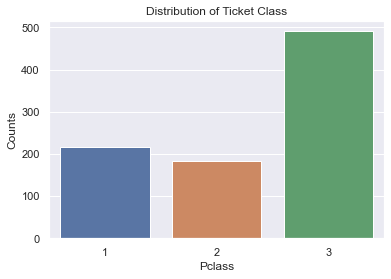

In [419]:
pclass = train_df["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(pclass.index, pclass.values)
plt.title("Distribution of Ticket Class")
plt.xlabel("Pclass")
plt.ylabel("Counts")
plt.show()

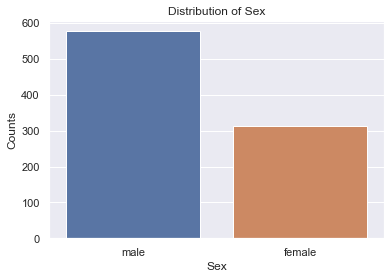

In [420]:
sex = train_df["Sex"].value_counts()
sns.set(style="darkgrid")
sns.barplot(sex.index, sex.values)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Counts")
plt.show()

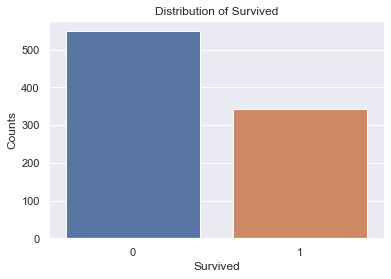

In [421]:
survived = train_df["Survived"].value_counts()
sns.set(style="darkgrid")
sns.barplot(survived.index, survived.values)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Counts")
plt.show()

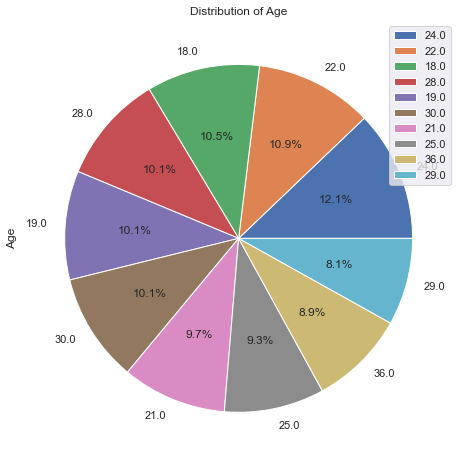

In [422]:
train_df["Age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Age")
plt.show()

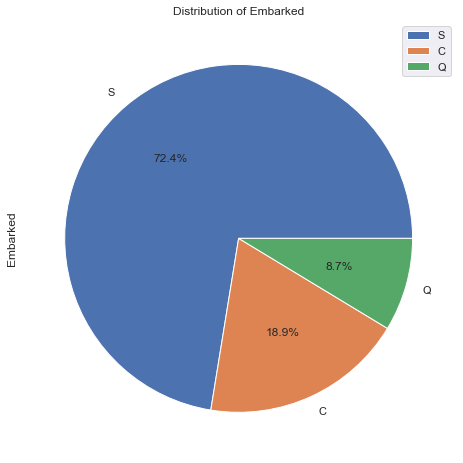

In [423]:
train_df["Embarked"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Embarked")
plt.show()

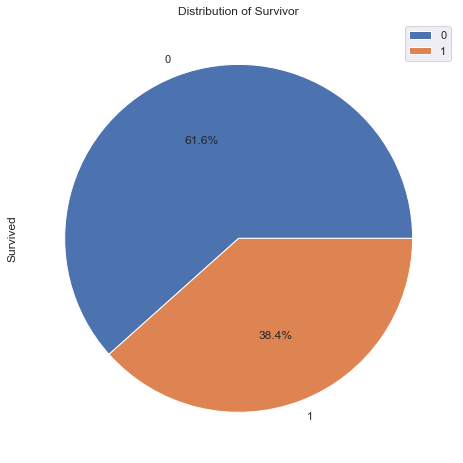

In [424]:
train_df["Survived"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
plt.title("Distribution of Survivor")
plt.show()

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

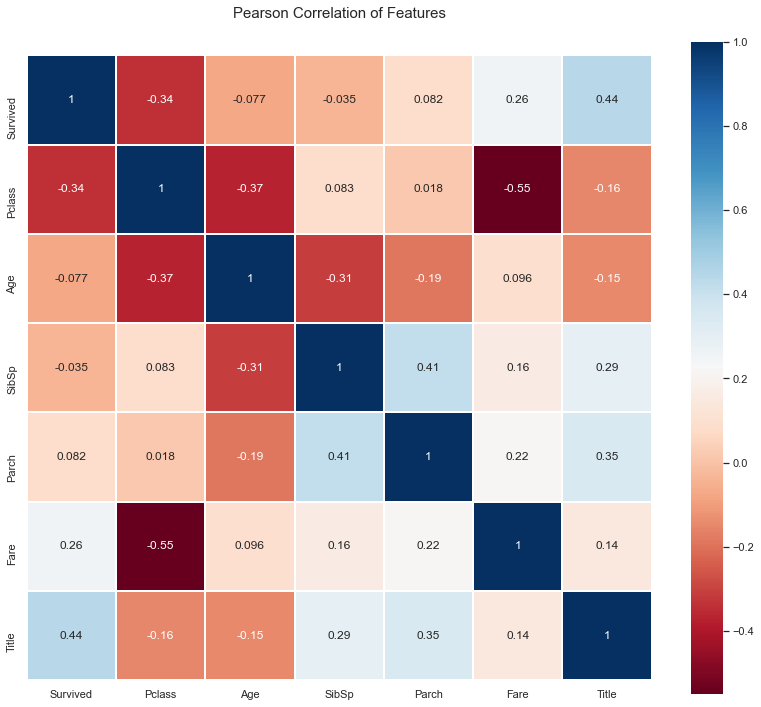

In [425]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [426]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [427]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [428]:
train_df[["Age", "Survived"]].groupby(["Age"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [429]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [430]:
train_df[["Fare", "Survived"]].groupby(["Fare"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


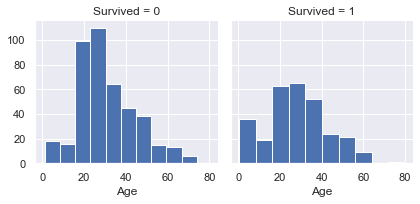

In [431]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age")

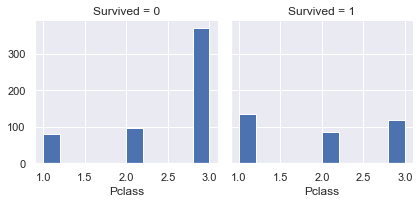

In [432]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Pclass")

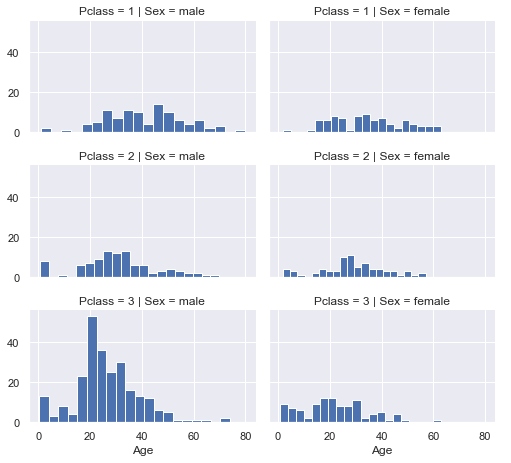

In [433]:
g = sns.FacetGrid(train_df, row="Pclass", col="Sex", size=2.2, aspect=1.6)
g.map(plt.hist, "Age", bins=20)
g.add_legend()

In [434]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [435]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [436]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [437]:
train_df["AgeRange"] = pd.cut(train_df['Age'], 6)
train_df[["AgeRange", "Survived"]].groupby(["AgeRange"], as_index=False).mean().sort_values(by="AgeRange", ascending=True)

,AgeRange,Survived
0,"(-0.08, 13.333]",0.591549
1,"(13.333, 26.667]",0.317708
2,"(26.667, 40.0]",0.427083
3,"(40.0, 53.333]",0.397959
4,"(53.333, 66.667]",0.348837
5,"(66.667, 80.0]",0.142857


In [438]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 14, "Age"] = 0
    dataset.loc[(dataset["Age"] > 14) & (dataset["Age"] <= 27), "Age"] = 1
    dataset.loc[(dataset["Age"] > 27) & (dataset["Age"] <= 40), "Age"] = 2
    dataset.loc[(dataset["Age"] > 40) & (dataset["Age"] <= 53), "Age"] = 3
    dataset.loc[(dataset["Age"] > 53) & (dataset["Age"] <= 67), "Age"] = 4
    dataset.loc[dataset["Age"] > 67, "Age"] = 5

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeRange
0,0,3,0,1,1,0,7.2500,S,1,"(13.333, 26.667]"
1,1,1,1,2,1,0,71.2833,C,3,"(26.667, 40.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(13.333, 26.667]"
3,1,1,1,2,1,0,53.1000,S,3,"(26.667, 40.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(26.667, 40.0]"


In [439]:
train_df = train_df.drop(["AgeRange"], axis=1)
combine = [train_df, test_df]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,4
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


In [440]:
most_common_embarked = train_df["Embarked"].dropna().mode()[0]
most_common_embarked

'S'

In [441]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(most_common_embarked)

train_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [442]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [443]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1


In [444]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,0,1
1,1,1,1,2,1,0,71.2833,1,3
2,1,3,1,1,0,0,7.9250,0,2
3,1,1,1,2,1,0,53.1000,0,3
4,0,3,0,2,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,0,4
887,1,1,1,1,0,0,30.0000,0,2
888,0,3,1,1,1,2,23.4500,0,2
889,1,1,0,1,0,0,30.0000,1,1


In [445]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,2,1
1,893,3,1,3,1,0,7.0000,0,3
2,894,2,0,4,0,0,9.6875,2,1
3,895,3,0,1,0,0,8.6625,0,1
4,896,3,1,1,1,1,12.2875,0,3


In [446]:
test = test_df["Fare"].dropna().median()
test

14.4542

In [447]:
train_df["FareRange"] = pd.qcut(train_df['Fare'], 4)
train_df[["FareRange", "Survived"]].groupby(["FareRange"], as_index=False).mean().sort_values(by="FareRange", ascending=True)

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [448]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 31, "Fare"] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(["FareRange"], axis=1)
combine = [train_df, test_df]
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,0,0,1
1,1,1,1,2,1,0,3,1,3
2,1,3,1,1,0,0,1,0,2
3,1,1,1,2,1,0,3,0,3
4,0,3,0,2,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,0,4
887,1,1,1,1,0,0,2,0,2
888,0,3,1,1,1,2,2,0,2
889,1,1,0,1,0,0,2,1,1


In [449]:
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
 0           0       3    0    1      1      0     0         0      1
 1           1       1    1    2      1      0     3         1      3
 2           1       3    1    1      0      0     1         0      2
 3           1       1    1    2      1      0     3         0      3
 4           0       3    0    2      0      0     1         0      1
 ..        ...     ...  ...  ...    ...    ...   ...       ...    ...
 886         0       2    0    1      0      0     1         0      4
 887         1       1    1    1      0      0     2         0      2
 888         0       3    1    1      1      2     2         0      2
 889         1       1    0    1      0      0     2         1      1
 890         0       3    0    2      0      0     0         2      1
 
 [891 rows x 9 columns],
      PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
 0            892       3    0    2      0      0     0     

In [451]:
for dataset in combine:
    dataset["FamilyCount"] = dataset["SibSp"] + dataset["Parch"] + 1

train_df[["FamilyCount","Survived"]].groupby(["FamilyCount"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilyCount,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [454]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilyCount"] ==  1, "IsAlone"] = 1

train_df[["IsAlone","Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [457]:
train_df = train_df.drop(["SibSp","Parch","FamilyCount"], axis=1)
test_df = test_df.drop(["SibSp","Parch","FamilyCount"], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [458]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,4,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [459]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,3,0,0,3,0
2,894,2,0,4,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,2,0,2,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


In [461]:
X_train = train_df.drop(["Survived"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop(["PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [466]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy for logistic regression : {}".format(acc_log))

Accuracy for logistic regression : 82.38


In [463]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.095992
5,Title,0.537204
4,Embarked,0.270436
6,IsAlone,0.268480
3,Fare,-0.064160
2,Age,-0.416520
0,Pclass,-1.250100


In [475]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Support Vector Machines : {}".format(acc_svc))

Accuracy for Support Vector Machines : 83.05


In [469]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("Accuracy for KNN : {}".format(acc_knn))

Accuracy for KNN : 85.97


In [470]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("Accuracy for Gaussian NB : {}".format(acc_gaussian))

Accuracy for Gaussian NB : 78.11


In [471]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("Accuracy for Perceptron : {}".format(acc_perceptron))

Accuracy for Perceptron : 61.62


In [472]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("Accuracy for Linear SVC : {}".format(acc_linear_svc))

Accuracy for Linear SVC : 80.36


In [473]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("Accuracy for SGD : {}".format(acc_sgd))

Accuracy for SGD : 80.47


In [478]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy for Decision Tree : {}".format(acc_decision_tree))

Accuracy for Decision Tree : 87.65


In [476]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy for Random Forest : {}".format(acc_decision_tree))

Accuracy for Random Forest : 87.65


In [477]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.65
8,Decision Tree,87.65
1,KNN,85.97
0,Support Vector Machines,83.05
2,Logistic Regression,82.38
6,Stochastic Gradient Decent,80.47
7,Linear SVC,80.36
4,Naive Bayes,78.11
5,Perceptron,61.62


In [538]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [540]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [535]:
survived_list = []
for dataset in submission["Survived"]:
    if dataset == 0:
        survived_list.append("Death")
    else:
        survived_list.append("Alive")

survived_list

['Death',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Death',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Alive',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Death',
 'Alive',
 'Death',


In [536]:
submission_readable = submission
submission_readable["Survived"] = survived_list
submission_readable

,PassengerId,Survived
0,892,Death
1,893,Death
2,894,Death
3,895,Death
4,896,Alive
...,...,...
413,1305,Death
414,1306,Alive
415,1307,Death
416,1308,Death


In [542]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
